In [484]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
# this is the transformer tool used to normalise the different scale values
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [485]:
#read text file into a Dataframe
import numpy as np
df = pd.read_csv("df_audio_features_5000.csv")
#df.head()

In [486]:
#df.drop(columns = ['key'], inplace=True) # drop columns not working therefore probably issue with header names
print(df.columns) # printing columns to check for leading trailing white spaces

Index(['name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')


In [487]:
# rstrip() - removes right spaces (trailing) would have sufficed here
# lstrip() - removes left spaces (leading)
# strip() - removes both l & r spaces (leading)
df.columns = df.columns.str.strip() # remove both leading & trailing spaces 
#print(df.columns)

In [488]:
df['name'] = df['name'].str.strip() # remove leading & trailing spaces
df['artist'] = df['artist'].str.strip() # remove leading & trailing spaces

In [489]:
df.drop(['key','mode','time_signature', 'type', 'duration_ms','id', 'html'], axis=1, inplace=True)
print(df.columns)

Index(['name', 'artist', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')


In [490]:
# check for duplicates

dchk = df[df.duplicated(subset=['name','artist'], keep=False)]
print(df.duplicated().sum())
#df.duplicated

67


In [491]:
# drop rows which have same name and artist as these are duplicates

dfk = df.drop_duplicates(
  subset = ['name', 'artist'],
  keep = 'last').reset_index(drop = True)

In [492]:
# set the index as 'name' & 'artist'

dfk = dfk.set_index(['name', 'artist'])

dfk.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5114 entries, ('Se Eu Quiser Falar Com Deus', 'Gilberto Gil') to ('Ravel: Boléro, M. 81', 'Maurice Ravel')
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5114 non-null   float64
 1   energy            5114 non-null   float64
 2   loudness          5114 non-null   float64
 3   speechiness       5114 non-null   float64
 4   acousticness      5114 non-null   float64
 5   instrumentalness  5114 non-null   float64
 6   liveness          5114 non-null   float64
 7   valence           5114 non-null   float64
 8   tempo             5114 non-null   float64
dtypes: float64(9)
memory usage: 629.4+ KB


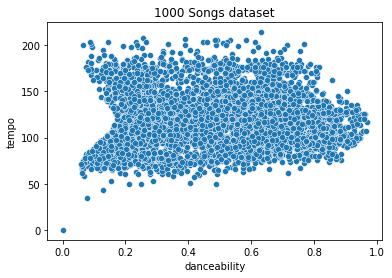

In [493]:
#Relation between two audio features danceabitlity and energy
#columns = dfk.columns

dfk.dropna(inplace=True)
plt.title('1000 Songs dataset')
sns.scatterplot(data = dfk, x = 'danceability', y = 'tempo')
plt.show()

## Data Scaling


In [494]:
# we use MinMaxScaler from sklearn.preprocessing

# initialize the transformer (optionally, set parameters)
my_min_max = MinMaxScaler(feature_range=(0,1))
# fit the transformer to the data
my_min_max.fit(dfk)
# use the transformer to transform the data
scaled_array = my_min_max.transform(dfk) 
# reconvert the transformed data back to a DataFrame
scaled_dfk = pd.DataFrame(scaled_array,
             index=dfk.index,
             columns=dfk.columns)

In [495]:
#scaled_dfk

## KMeans

In [496]:
# here we use sklearn.cluster to establish our clusters through KMeans

# initialize the model and assign the number of clusters
my_kmeans = KMeans(n_clusters= 45)

In [497]:
# fit the model to the data
my_kmeans.fit(scaled_dfk) # pass your scaled data here

KMeans(n_clusters=45)

In [498]:
# here the cluster which has been assigned can be added to the df 

## Visualise the relation between variables

In [499]:
#dfk.drop(['cluster'], axis=1, inplace=True)

In [500]:
columns = dfk.columns
centroids = pd.DataFrame(my_kmeans.cluster_centers_)
centroids.columns = columns    #put the column names same as the original data
#centroids

In [501]:
# obtain the cluster output
# clusters = my_kmeans.predict(scaled_dfk) # pass your scaled data here
# attach the cluster output to our original DataFrame
# dfk["cluster"] = clusters

In [502]:
columns = dfk.columns
plot_data = pd.DataFrame(scaled_dfk)
plot_data.columns = columns
plot_data['cluster'] = my_kmeans.labels_ #also can be written as my_kmeans.predict(scaled_data)
plot_data.head()

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,artist,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.2590,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,29
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.3990,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,6
Mulher Eu Sei,Chico César,0.729059,0.0502,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,41
Rosa Morena,Kurt Elling,0.673216,0.1190,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,18
Desafinado,Stan Getz,0.481903,0.1460,0.692837,0.070697,0.934739,0.156345,0.108409,0.429442,0.667718,18


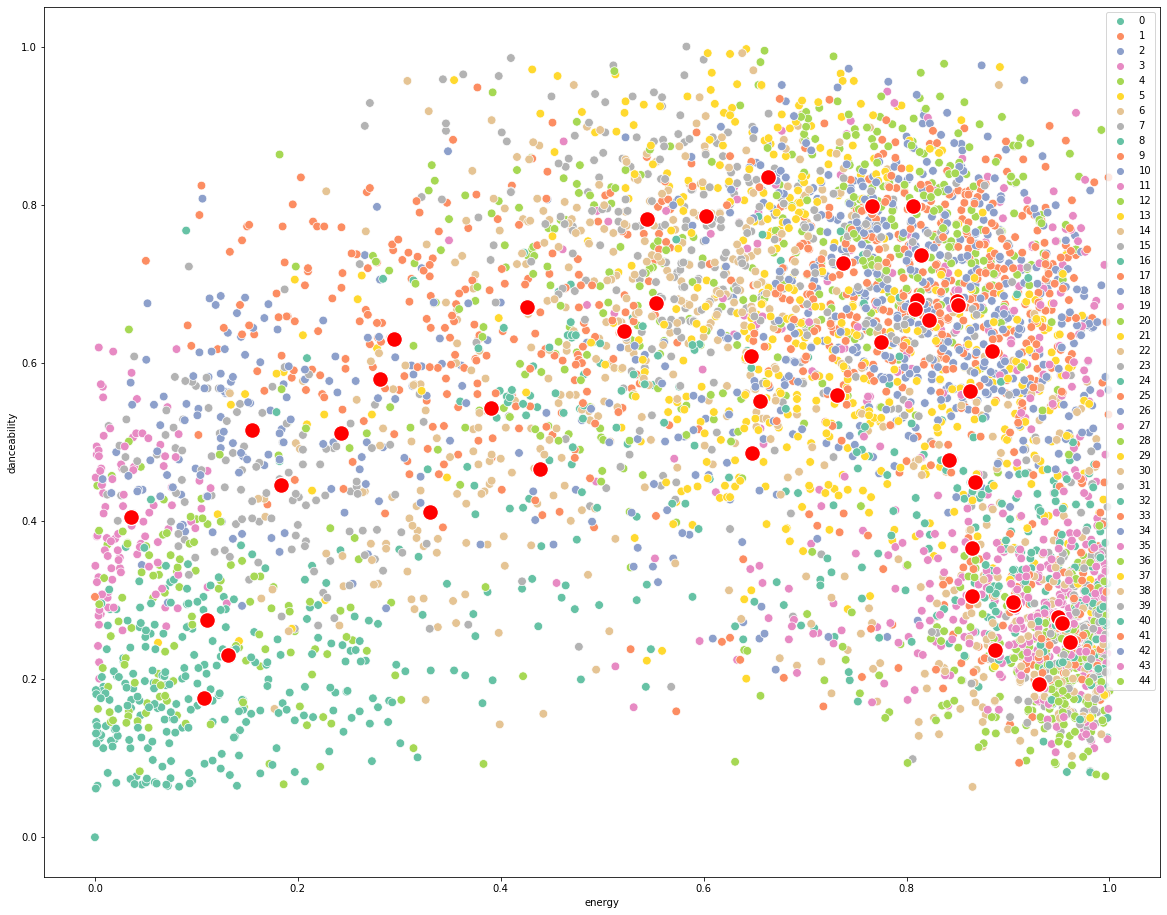

In [503]:
fig, ax=plt.subplots(figsize = (20,16))
sns.scatterplot(data=plot_data, x='energy', y='danceability', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=centroids, x='energy', y='danceability', color='red', s=250)
plt.show()

## Evaluate when checking the distance between centroids

In [535]:
#to know which clusters are close together and which ones are more distant, we use distance method from the 1st notebook

from sklearn.metrics import pairwise_distances

# Euclidean (by default)
e_dist = pd.DataFrame(pairwise_distances(scaled_dfk), index=dfk.index, columns=dfk.index) # here I used the scaled dataframe not the original df
#e_dist.head()

In [505]:
# this is another heatmap 

'''fig, ax=plt.subplots(figsize = (12,8))
sns.heatmap(e_dist)
plt.title('Eucledian distance')
plt.show()'''

"fig, ax=plt.subplots(figsize = (12,8))\nsns.heatmap(e_dist)\nplt.title('Eucledian distance')\nplt.show()"

## Using Inertia

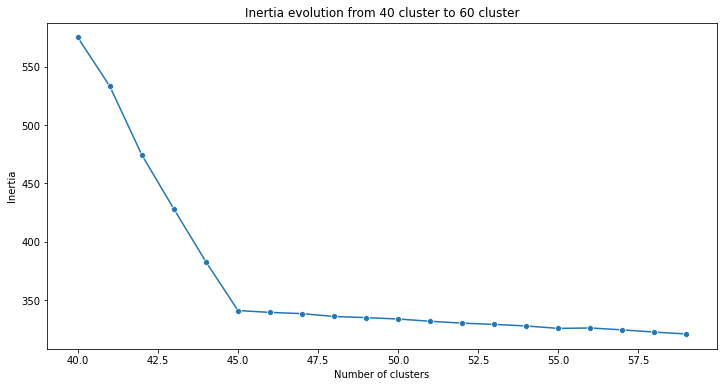

In [538]:
max_k = 60
inertia = []

for k in range(40, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(scaled_dfk).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 40 cluster to {max_k} cluster')
sns.lineplot(x=range(40, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Silhoutte Scores

In [539]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_dfk, my_kmeans.labels_)

0.7338192786269583

## Silhoutte Scores

 - K5 =  0.5444997217540707
 - K19 = 0.7048284866489333 
 - K20 = 0.7105283932757014
 - K22 = 0.6672709950936638
 - K25 = 0.5869845438910369
 - K30 = 0.4780814537512436
 - K35 = 0.3088729885219794

## Number of observations per cluster

In [543]:
opc = scaled_dfk.copy()
#opc['cluster'].replace({0: 'Moosic Madness', 1: 'Poppin Pop', 2: 'Charting Now', 3: 'Songs in the key of Z', 4: 'Movie Madness', 5: 'Out on the Weekend', 6: 'Acoustic Blues', 7: 'Party Bash', 8: 'Big Band Favs', 9: 'Shrutis Specials', 10: 'Besta Bosa', 11: 'Season Specials', 12: 'The S Club Sounds', 13: 'Heartfelt', 14: 'Sounds of the South', 15: 'Five Songs Left', 16: 'Feel Good Sounds', 17: 'Folk, Blues & Beyond', 18: 'BeatBox', 19: 'Martins MashUp', 20: 'Chillin', 21: 'Outta this World', 22: 'Melody Moods', 23: 'Night Clubbin', 24: 'Amazing Arias', 25: 'Mighty Mix', 26: 'Classic Rock', 27: 'Play it by Ear', 28: 'Dance the Night Away', 29: 'Runnin Live', 30: 'Moonlights', 31: 'Closing Time', 32: 'Heavy Metaall', 33: 'Sunday Morning', 34: 'Sounds of Summer', 35: 'Dreamy Themes', 36: 'Night Train', 37: 'Groovin….', 38: 'Drive Time Sounds', 39: 'Techno Hops', 40: 'Dancin on the Ceiling', 41: 'Power Ballads', 42: 'Summer Breeze', 43: 'Easy Listening', 44: 'Party Mix'},inplace=True)
opc.head()

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,artist,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.2590,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,29
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.3990,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,6
Mulher Eu Sei,Chico César,0.729059,0.0502,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,41
Rosa Morena,Kurt Elling,0.673216,0.1190,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,18
Desafinado,Stan Getz,0.481903,0.1460,0.692837,0.070697,0.934739,0.156345,0.108409,0.429442,0.667718,18


In [512]:
opc.reset_index(inplace=True)    #to set name and index as columns
#opc  

In [544]:
#Checking for instrumentalness feature as an example 
Inst = opc.loc[opc['instrumentalness']>= 0.95]
Inst.groupby('cluster')['instrumentalness'].count()

cluster
3     31
4     13
7     20
11    18
16    24
20     4
22    36
27     5
28    24
34     5
35     1
44     6
Name: instrumentalness, dtype: int64

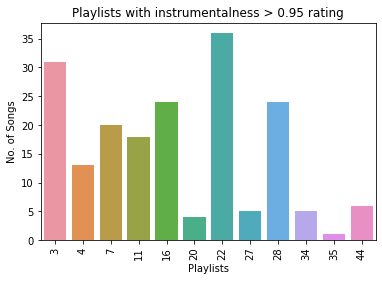

In [545]:
ax = sns.countplot(data=Inst, x='cluster')
ax.tick_params(axis='x', rotation=90)
sns.color_palette("pastel")

#plt.ylim(100, 15500000)
plt.xlabel('Playlists')
plt.ylabel('No. of Songs')
plt.title('Playlists with instrumentalness > 0.95 rating')
plt.ticklabel_format(style='plain', axis='y')
#ax.set_xticklabels(['Expensive (> 500 Eur)', 'Che

In [547]:
# gropuby cluster to see how may songs are in each cluster

opcg = opc.groupby(by='cluster')['tempo'].count()
#opcg

In [542]:
#opcg.to_csv("Playlists")

In [516]:
# rename the clusters tp playlists

opc['cluster'].replace({'0': 'Moosic Madness', '1': 'Poppin Pop', '2': 'Charting Now', '3': 'Songs in the key of Z', '4': 'Movie Madness', '5': 'Out on the Weekend', '6': 'Acoustic Blues', '7': 'Party Bash', '8': 'Big Band Favs', '9': 'Shrutis Specials', '10': 'Besta Bosa', '11': 'Season Specials', '12': 'The S Club Sounds', '13': 'Heartfelt', '14': 'Sounds of the South', '15': 'Five Songs Left', '16': 'Feel Good Sounds', '17': 'Folk, Blues & Beyond', '18': 'BeatBox', '19': 'Martins MashUp', '20': 'Chillin', '21': 'Outta this World', '22': 'Melody Moods', '23': 'Night Clubbin', '24': 'Amazing Arias', '25': 'Mighty Mix', '26': 'Classic Rock', '27': 'Play it by Ear', '28': 'Dance the Night Away', '29': 'Runnin Live', '30': 'Moonlights', '31': 'Closing Time', '32': 'Heavy Metaall', '33': 'Sunday Morning', '34': 'Sounds of Summer', '35': 'Dreamy Themes', '36': 'Night Train', '37': 'Groovin….', '38': 'Drive Time Sounds', '39': 'Techno Hops', '40': 'Dancin on the Ceiling', '41': 'Power Ballads', '42': 'Summer Breeze', '43': 'Easy Listening', '44': 'Party Mix'},inplace=True)
opc.head()

,name,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.2590,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,29
1,Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.3990,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,6
2,Mulher Eu Sei,Chico César,0.729059,0.0502,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,41
3,Rosa Morena,Kurt Elling,0.673216,0.1190,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,18
4,Desafinado,Stan Getz,0.481903,0.1460,0.692837,0.070697,0.934739,0.156345,0.108409,0.429442,0.667718,18


In [517]:
#opc

In [518]:
opcg16 = opc.query('cluster == 16 ')
opcg16

,name,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
203,Sigur 1 (Untitled),Sigur Rós,0.304033,0.12700,0.751263,0.036166,0.918675,0.774619,0.073354,0.040609,0.399192,16
1727,I. Adagio sostenuto,Ludwig van Beethoven,0.145812,0.00123,0.263262,0.046732,0.997992,0.956345,0.111449,0.085584,0.365227,16
1736,"6 Chorale Preludes, BV B 50: Herzlich tut mich...",Johannes Brahms,0.125129,0.00488,0.332888,0.043682,0.998996,0.938071,0.070314,0.188832,0.392640,16
1738,"Prelude in B minor, BWV 855a (Arr. by Alexande...",Johann Sebastian Bach,0.188211,0.03770,0.427961,0.042593,0.990964,0.971574,0.081459,0.093706,0.469564,16
1739,"2 Mélodies, Op.3: II. Andante (Arr. for Cello ...",Anton Rubinstein,0.322647,0.07420,0.646295,0.041285,0.990964,0.761421,0.071226,0.098883,0.477648,16
...,...,...,...,...,...,...,...,...,...,...,...,...
5108,A Flock Descends Into The Pentagonal Garden,Toru Takemitsu,0.064012,0.08300,0.561720,0.049237,0.938755,0.660914,0.087133,0.026497,0.287513,16
5109,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.208893,0.06940,0.596818,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,16
5111,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.061634,0.00093,0.277803,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,16
5112,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.137539,0.02080,0.498142,0.045643,0.886546,0.512690,0.112462,0.060000,0.313608,16


In [548]:
#Eucledean distance
#e_dist16 = pd.DataFrame(pairwise_distances(opcg16), index=opcg16.index, columns=opcg16.index)

In [ ]:
fig, ax=plt.subplots(figsize = (20,16))
sns.heatmap(e_dist16)
plt.title('opcg16')
plt.show()

In [ ]:
dfk2 = scaled_dfk.copy()
dfk2.drop(['speechiness','cluster','liveness'], axis=1, inplace=True)
#dfk2
sns.pairplot(data = dfk2 )

## Sample for comparing 2 features

In [532]:
columns = ['danceability', 'energy']

sample = dfk.filter(columns)
sample.head()

,,danceability,energy
name,artist,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990
Mulher Eu Sei,Chico César,0.705,0.0502
Rosa Morena,Kurt Elling,0.651,0.1190
Desafinado,Stan Getz,0.466,0.1460


In [522]:
sample_kmeans = KMeans(n_clusters=45).fit(sample)

sample_kmeans

KMeans(n_clusters=45)

In [523]:
columns = ['danceability', 'energy']

centroids = pd.DataFrame(sample_kmeans.cluster_centers_)
centroids.columns = columns
centroids

,danceability,energy
0,0.204009,0.064806
1,0.619216,0.930769
2,0.776345,0.668590
3,0.313820,0.877211
4,0.670244,0.155287
5,0.442355,0.472065
6,0.787969,0.772092
7,0.524815,0.639210
8,0.654266,0.558250
9,0.597307,0.743265


In [524]:
plot_data = pd.DataFrame(sample)
plot_data.columns = columns
plot_data['cluster'] = sample_kmeans.labels_#peng_kmeans.predict(peng_norm)
plot_data.head()

,,danceability,energy,cluster
name,artist,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,15
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,22
Mulher Eu Sei,Chico César,0.705,0.0502,4
Rosa Morena,Kurt Elling,0.651,0.1190,4
Desafinado,Stan Getz,0.466,0.1460,24


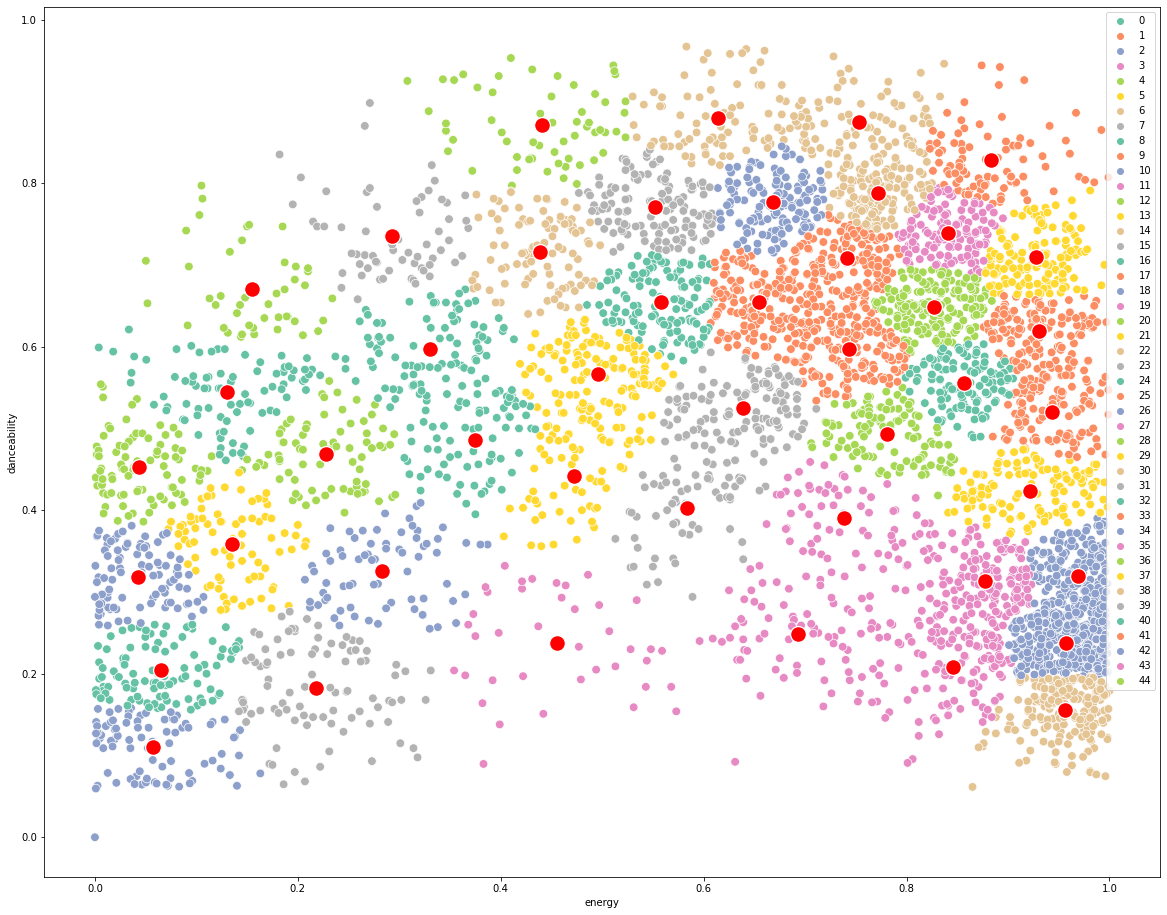

In [531]:
fig, ax=plt.subplots(figsize = (20,16))
sns.scatterplot(data=plot_data, x='energy', y='danceability', hue='cluster', palette='Set2',s=75)
sns.scatterplot(data=centroids, x='energy', y='danceability', color='red', s=250)
plt.show()

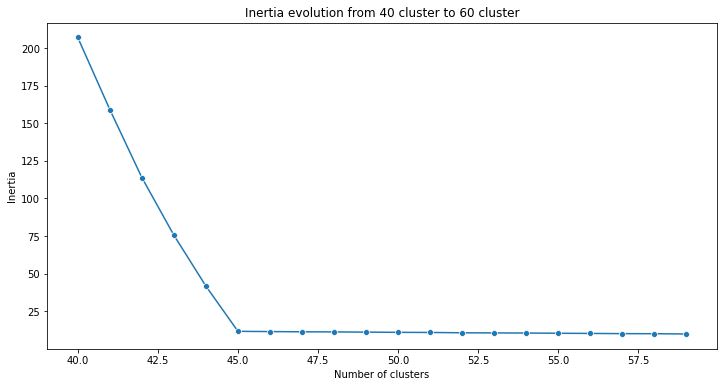

In [528]:
max_k = 60
inertia = []

for k in range(40, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(sample).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 40 cluster to {max_k} cluster')
sns.lineplot(x=range(40, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [529]:
from sklearn.metrics import silhouette_score
silhouette_score(sample, sample_kmeans.labels_)

0.9456054302538421